In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\Wine_data\cleaned_dataset_Wine.csv")

In [4]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Quality
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


# X and y

In [5]:
X = df.drop(columns = ['Quality'])
y = df['Quality']

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

# Modelling and evaluation

**Decision Tree classifier- with default hyperparameter**

In [7]:
# modeling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state = True)
dt_default.fit(X_train, y_train)

# Prediction
pred_train = dt_default.predict(X_train)
pred_test = dt_default.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(pred_train, y_train))
print("Test Accuracy : ", accuracy_score(pred_test, y_test))

from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(dt_default, X, y, cv=5).mean())


Train Accuracy :  1.0
Test Accuracy :  0.8611111111111112
cross_val_score :  0.8876190476190476


# visualize Tree

In [8]:
X_train.columns.tolist()

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

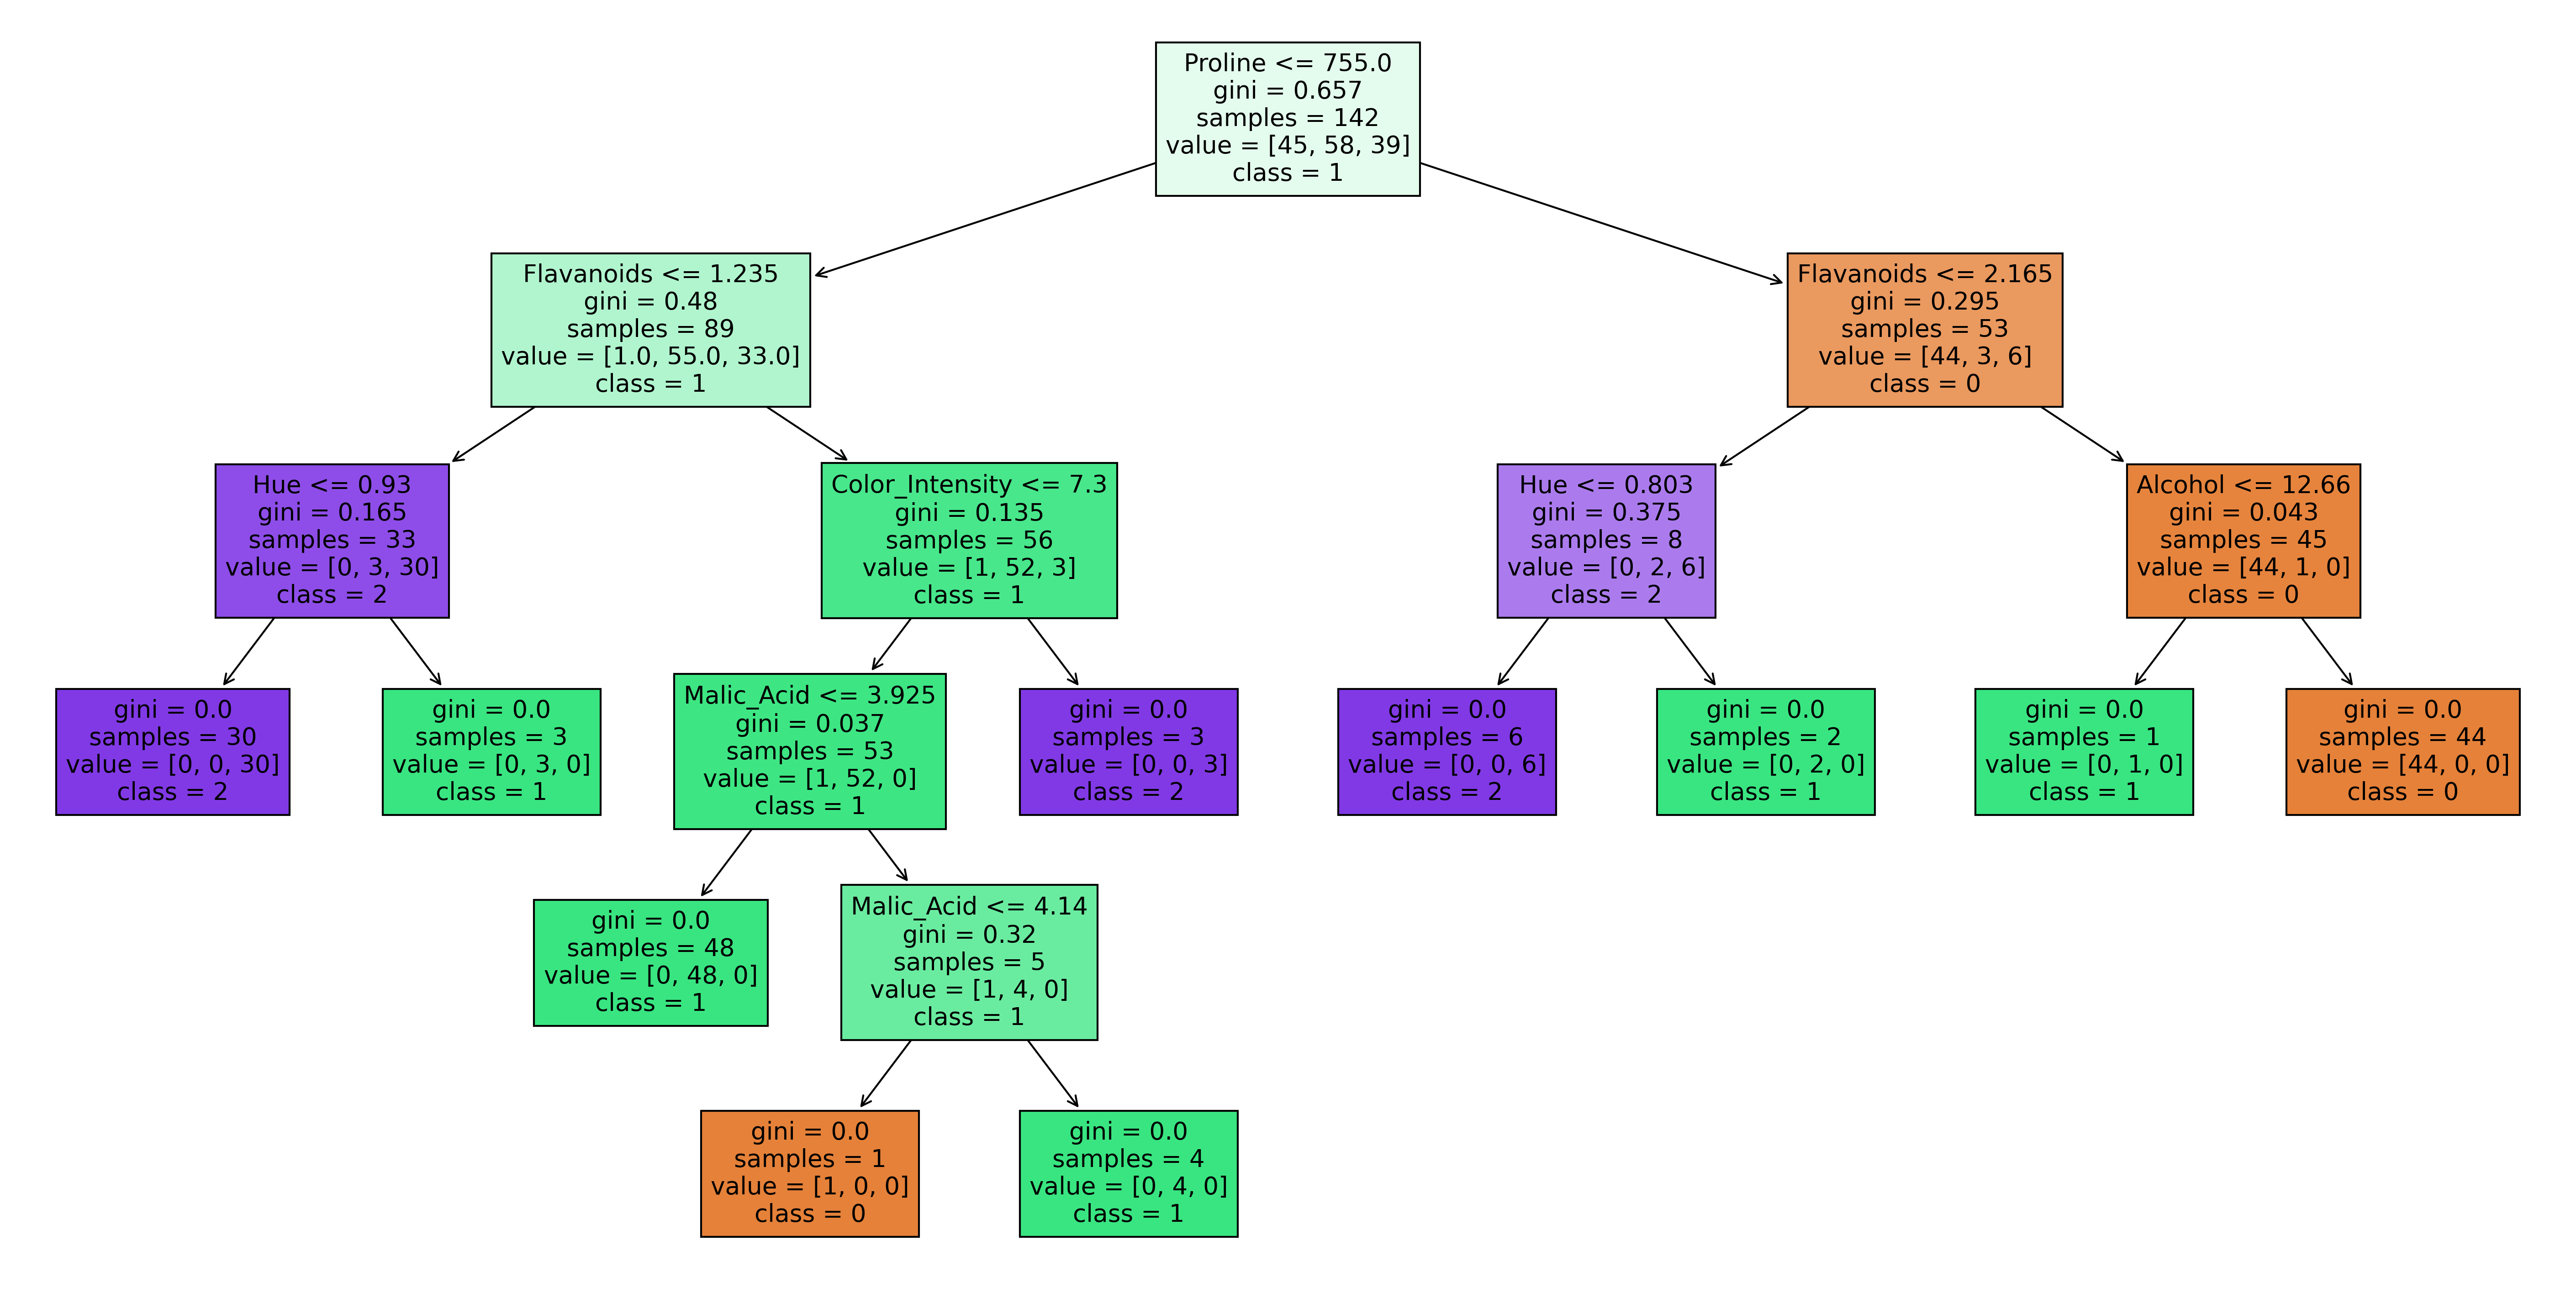

In [10]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12), dpi = 300)

plot_tree(dt_default,
         filled = True,
         feature_names = X_train.columns.tolist(),
         class_names = ['0','1','2']
         )
plt.show()

In [11]:
print("Depth of the tree:", dt_default.get_depth())


Depth of the tree: 5


# HyperParameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state = True)

# Parameters (which you want to tune and identify the best)
param_grid = {"criterion" : ['gini', 'entropy'], 
             'max_depth' : [1,2,3,4,5]}


grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv= 5)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [13]:
grid.best_estimator_.feature_importances_

array([0.        , 0.03665071, 0.        , 0.        , 0.02131674,
       0.        , 0.44082996, 0.        , 0.        , 0.06075398,
       0.05945784, 0.        , 0.38099077])

In [14]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index = X.columns,
                    columns = ['Feature Importance'])
feats_imp = feats[feats['Feature Importance'] > 0]
important_features_list = feats_imp.index.to_list()
important_features_list

['Malic_Acid', 'Magnesium', 'Flavanoids', 'Color_Intensity', 'Hue', 'Proline']

# Final Decision Tree model
**with best hyper parameters and imp_features**

In [15]:
# input with important features
X_imp = X[important_features_list]

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.2, random_state = True)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = True)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluation
print("Train Accuracy : ", accuracy_score(ypred_train, y_train))
print("Test Accuracy : ", accuracy_score(ypred_test, y_test))
print("Cross_val_score : ", cross_val_score(final_dt_model, X_imp, y, cv=5).mean())

Train Accuracy :  0.9929577464788732
Test Accuracy :  0.8888888888888888
Cross_val_score :  0.9042857142857142


In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred_test)

array([[13,  1,  0],
       [ 1, 12,  0],
       [ 0,  2,  7]], dtype=int64)